Imports:

In [102]:
import plotly.express as px 
import plotly.graph_objects as go
import pandas as pd
from utils.sqlite_utils import SQLiteDB
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from utils.analysis_utils import generate_times

Data as DataFrame:

In [103]:
        # connect to db
        sqlite_db = SQLiteDB(database='/Users/marcosmorenoblanco/Documents/bicing/bicing.db')
        query = "SELECT * From bicing"
        
        # import data from db through query
        results = sqlite_db.retrieve_as_df(query=query)

        # timestamp to datetime since it is saved as string
        results['timestamp'] = pd.to_datetime(results['timestamp'], infer_datetime_format=True)

        # # timestamp as index to filter through it
        # results.set_index('timestamp', inplace=True)

Selection of 5 stations from Gracia:

![Stations](./utils/stations.jpeg)

In [34]:
stations = ["C/ DE NIL FABRA, 16-20", "C/ DEL TORRENT DE LES FLORS, 102", "C/ PI I MARGALL, 38", "C/ DEL CANÓ, 1", "C/ NÀPOLS, 344" ]

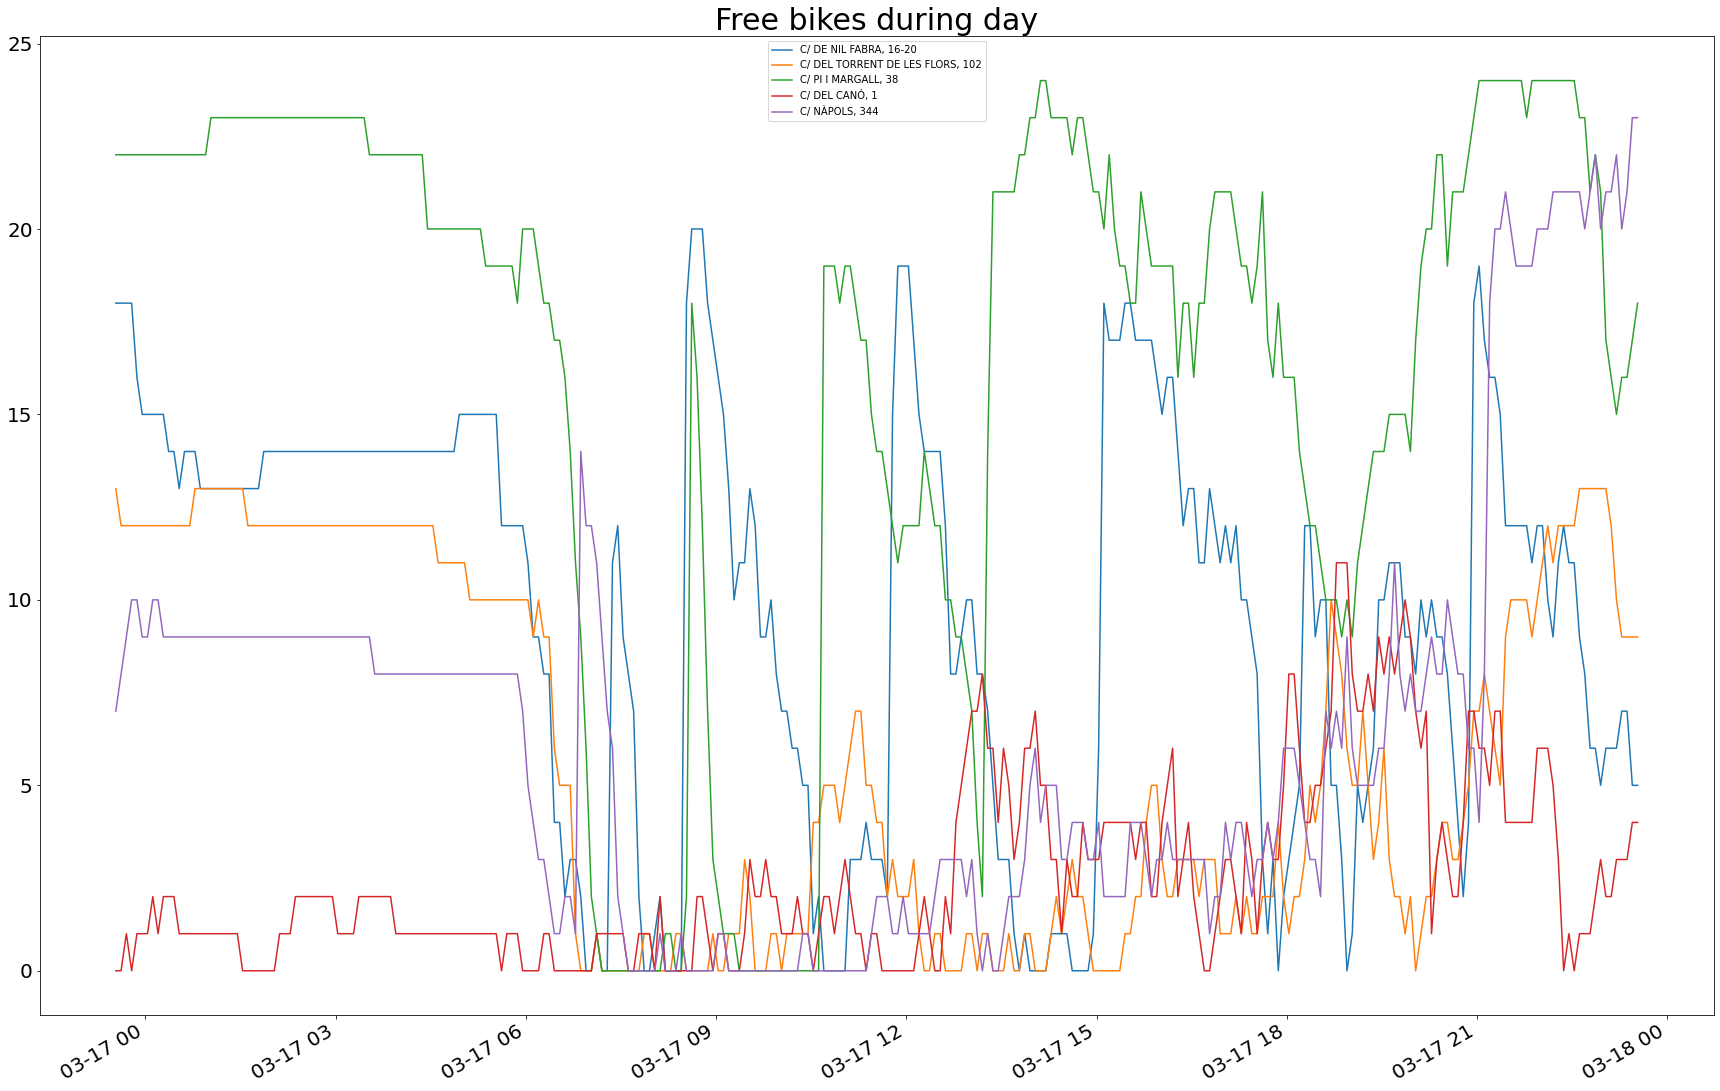

In [138]:
first_date = min(results['timestamp'].tolist())
last_date = max(results['timestamp'].tolist()) + timedelta(minutes=5)
times = pd.date_range(first_date, last_date, freq='5min').tolist() 
labels = [time for time in times]    
results['time_bin'] = pd.cut(results['timestamp'].values.astype('datetime64[ns]'), times, ordered = False, labels = labels[:-1], right=False)


keys = [station for station in stations]
free_bikesAval = {}
for key in keys: 
    free_bikesAval[key] = results[results['name'] == key]['free_bikes'].values 
barPlotdf = pd.DataFrame(free_bikesAval, index = labels[:-1])
fig = barPlotdf.plot(y = keys, use_index = True, figsize=(30,20), title = 'Free bikes during day', fontsize = 20)
fig.axes.title.set_size(30)


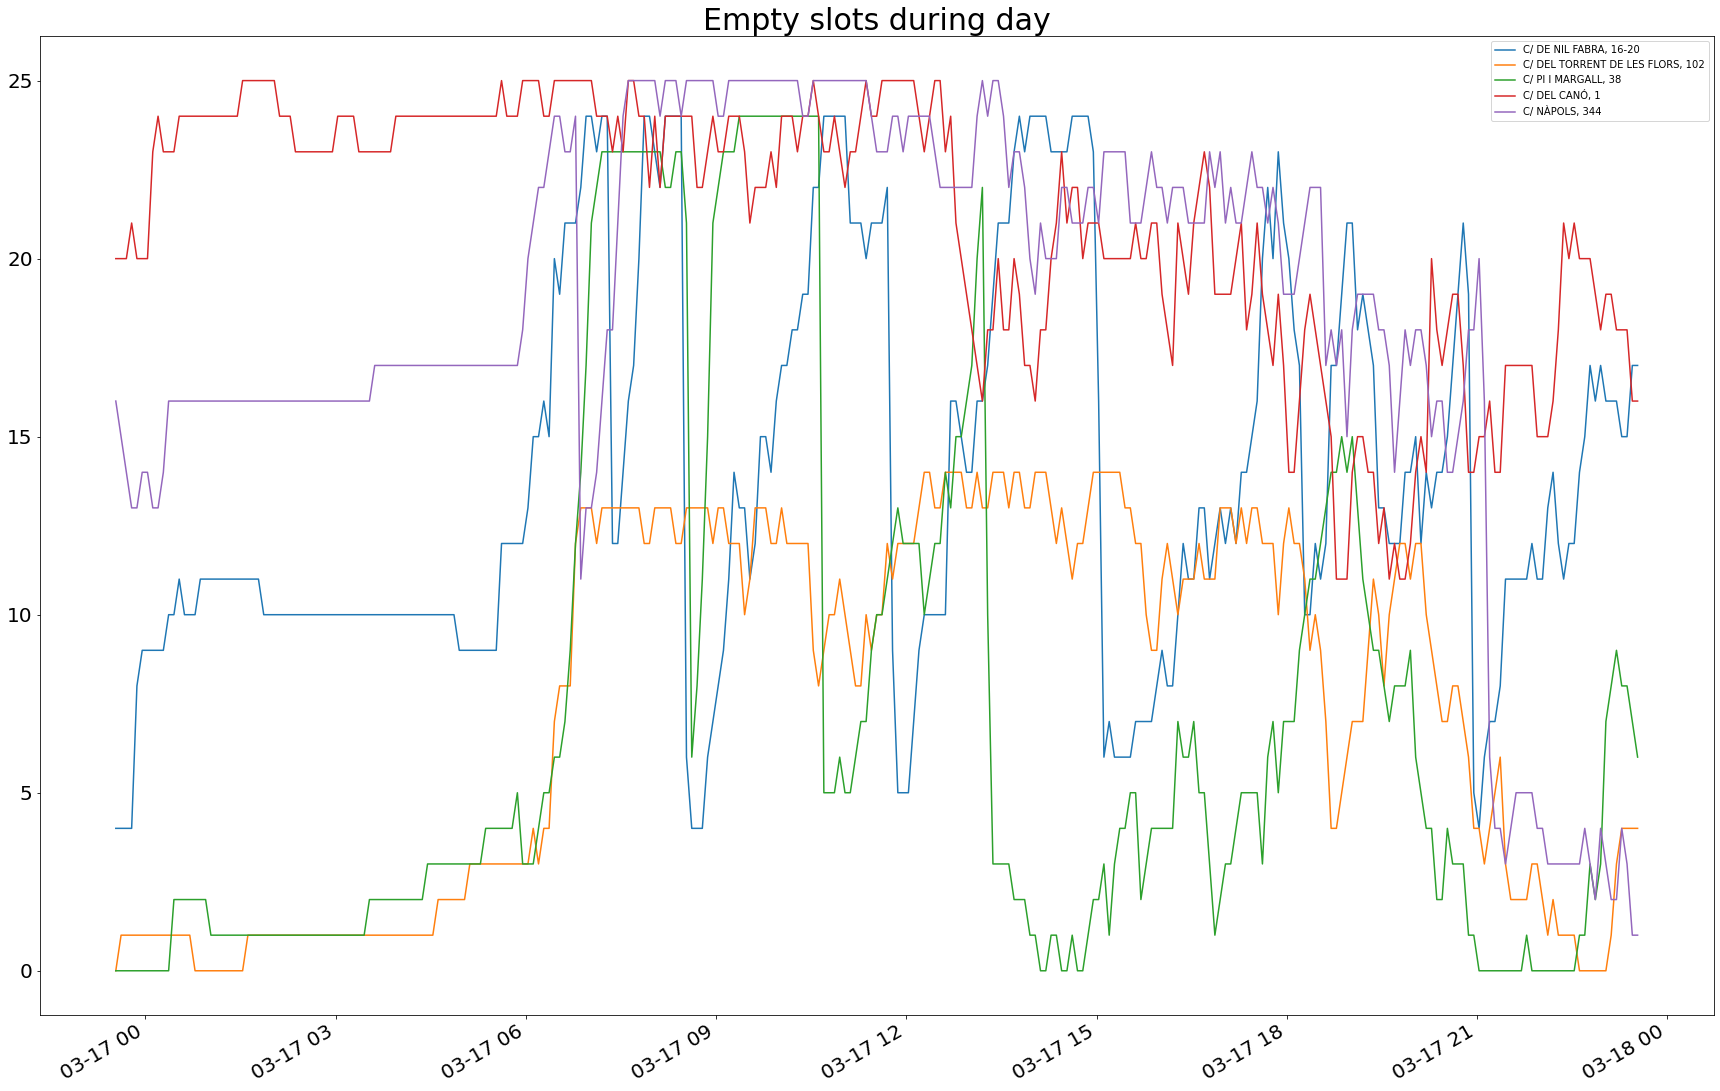

In [140]:
keys = [station for station in stations]
empty_slotsAval = {}
for key in keys: 
    empty_slotsAval[key] = results[results['name'] == key]['empty_slots'].values 

barPlotdf = pd.DataFrame(empty_slotsAval, index = labels[:-1])
fig = barPlotdf.plot(y = keys, use_index = True, figsize=(30,20), title = 'Empty slots during day', fontsize = 20)
fig.axes.title.set_size(30)

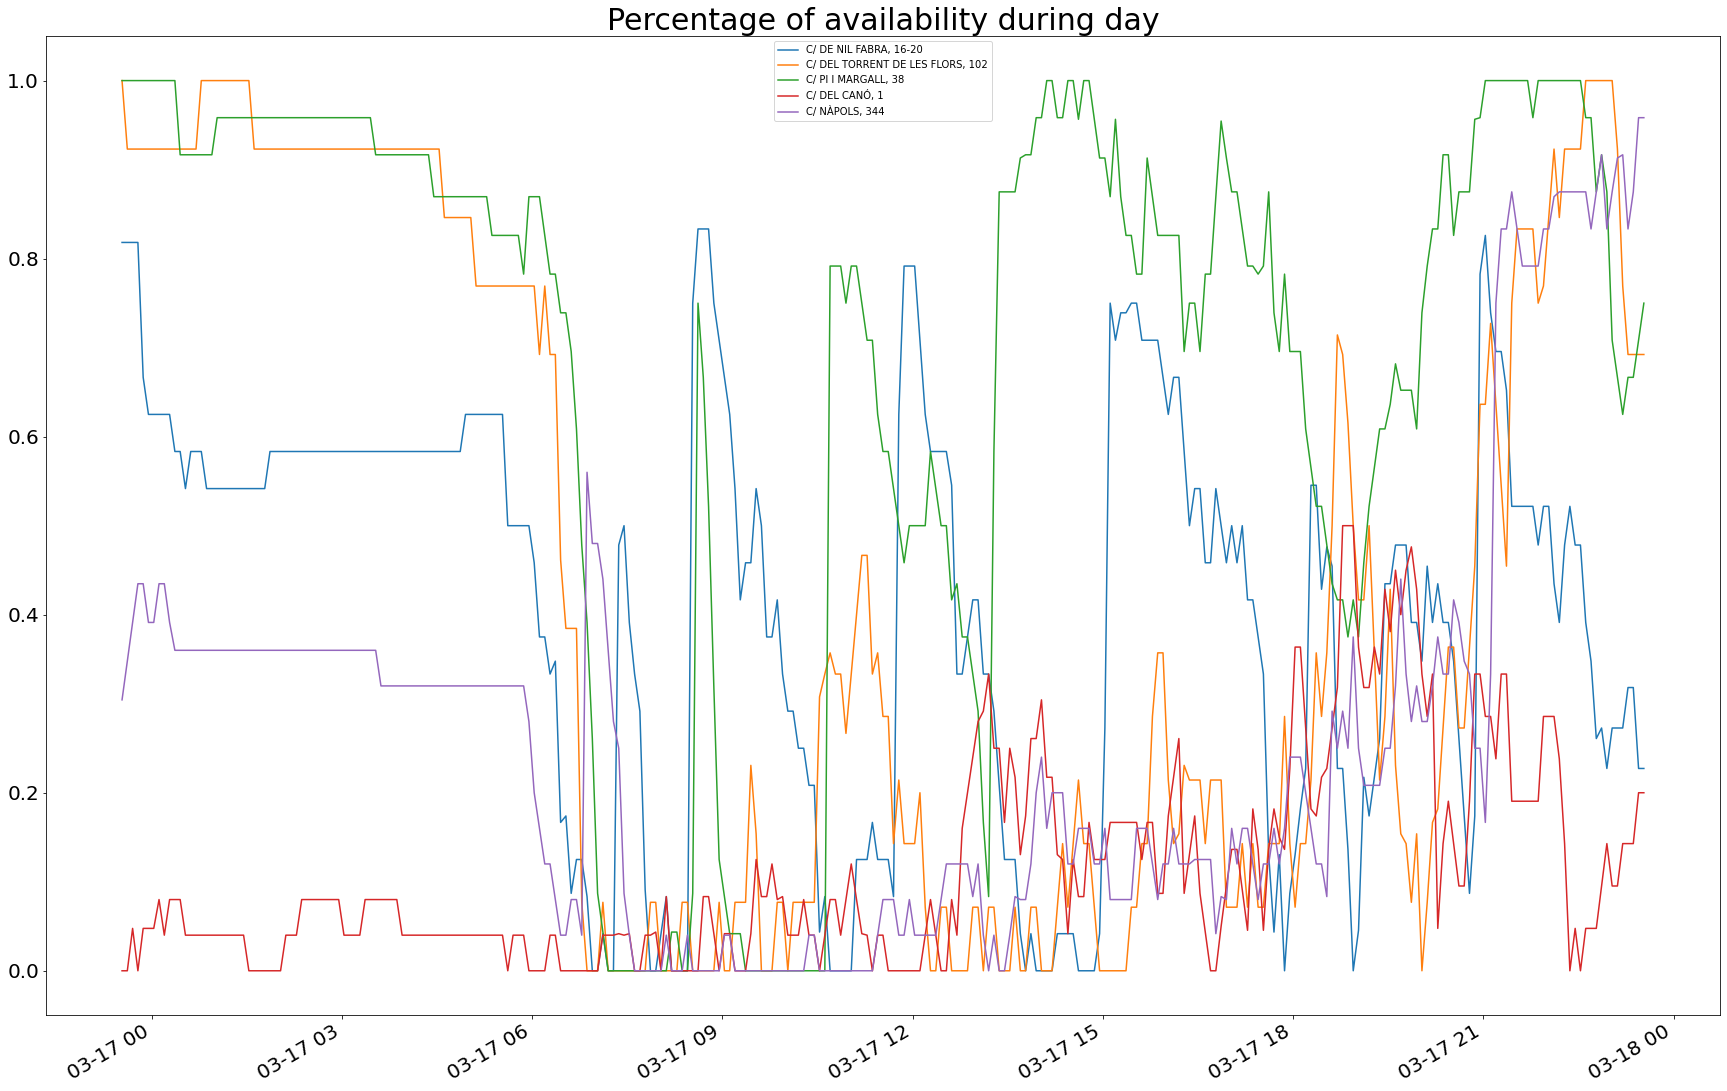

In [142]:
keys = [station for station in stations]
perc_availability = {}
for key in keys: 
    perc_availability[key] = results[results['name'] == key]['free_bikes'].values/(results[results['name'] == key]['empty_slots'].values + results[results['name'] == key]['free_bikes'].values)

barPlotdf = pd.DataFrame(perc_availability, index = labels[:-1])
fig = barPlotdf.plot(y = keys, use_index = True, figsize=(30,20), title = 'Percentage of availability during day', fontsize = 20)
fig.axes.title.set_size(30)


![Stations](./utils/stations_sol.jpeg)